In [99]:
import pandas as pd
import numpy as np

csv = pd.read_csv("./UsoIA.csv")

def eliminarPuntos (columnas):
  columnas =str(columnas)
  columnas=columnas.replace(".","")
  return columnas

def eliminarFila(nombreFila) :
  del csv[nombreFila]
  return

def separarRtas(columnas):
  columnas =str(columnas)
  columna = columnas.split(";")
  return columna

def sacarItilde(columnas):
  columnas =str(columnas)
  columnas = columnas.replace("í","i")
  return columnas

eliminarFila("Marca temporal")
csv = csv.applymap(lambda x: x.lower() if isinstance(x, str) else x)
csv = csv.applymap(eliminarPuntos)


csv["En el caso de haber respondido que sí a la anterior pregunta. ¿Cuál utilizaste?"]=csv["En el caso de haber respondido que sí a la anterior pregunta. ¿Cuál utilizaste?"].apply(separarRtas)
csv["¿Por qué motivo utilizaste/utilizas/utilizarías una inteligencia artificial?"]=csv["¿Por qué motivo utilizaste/utilizas/utilizarías una inteligencia artificial?"].apply(separarRtas)
csv["¿Escuchaste o viste una noticia falsa (fake new) creada por inteligencia artificial?"]=csv["¿Escuchaste o viste una noticia falsa (fake new) creada por inteligencia artificial?"].apply(sacarItilde)


csv.to_csv('./UsoIaModificado.csv')


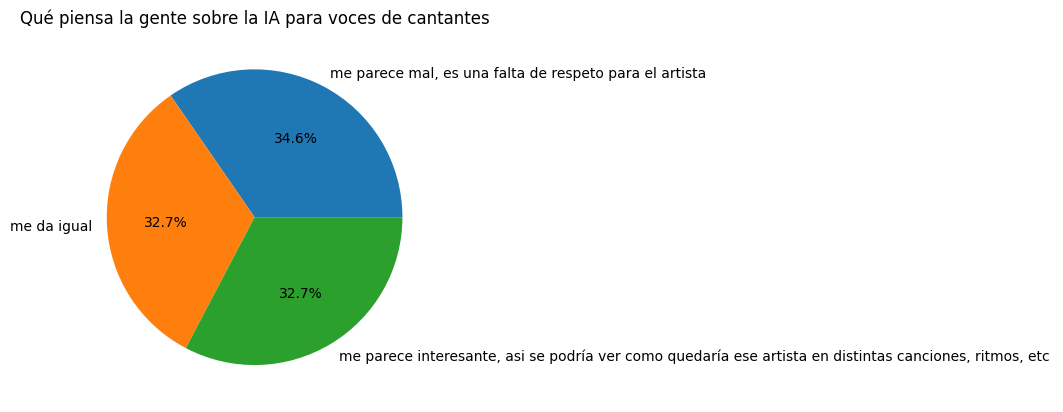

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UsoIaModificado.csv')


labels = df['¿Qué opinás del uso de IAs para recrear voces de cantantes?'].value_counts().index.to_list()
counts = df['¿Qué opinás del uso de IAs para recrear voces de cantantes?'].value_counts().to_list()


plt1.pie(counts, labels=labels, autopct='%1.1f%%')
plt1.title('Qué piensa la gente sobre la IA para voces de cantantes')
plt1.show()

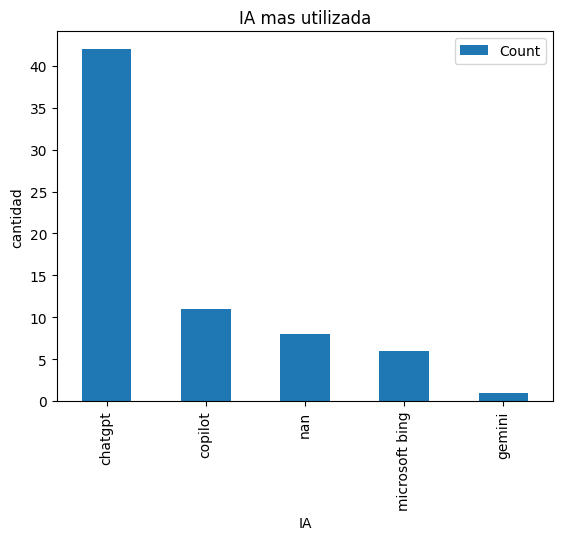

In [100]:
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

df = pd.read_csv('UsoIaModificado.csv')

ia_nombres = []
for i in range(len(df)):
    ia_nombres.extend(eval(df.loc[i, 'En el caso de haber respondido que sí a la anterior pregunta. ¿Cuál utilizaste?']))

ia_cant = {}
for name in ia_nombres:
    if name not in ia_cant:
        ia_cant[name] = 0
    ia_cant[name] += 1

ia_df = pd.DataFrame.from_dict(ia_cant, orient='index', columns=['Count'])
ia_df = ia_df.sort_values(by='Count', ascending=False)

ia_df.plot(kind='bar')
plt1.xlabel("IA")
plt1.ylabel("cantidad")
plt1.title("IA mas utilizada")
plt1.show()

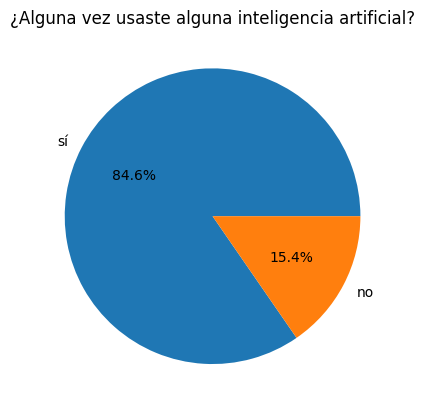

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('UsoIaModificado.csv')
counts = df['¿Alguna vez usaste alguna inteligencia artificial?'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('¿Alguna vez usaste alguna inteligencia artificial?')
plt.show()



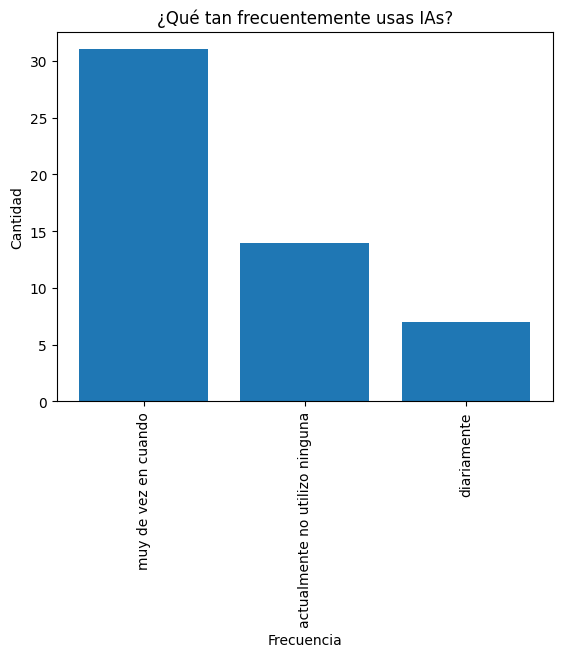

In [77]:
column_index = 4
counts = df.iloc[:, column_index].value_counts()
plt.bar(counts.index, counts.values)
plt.title('¿Qué tan frecuentemente usas IAs?')
plt.xlabel('Frecuencia')
plt.ylabel('Cantidad')
plt.xticks(rotation= 90)
plt.show()


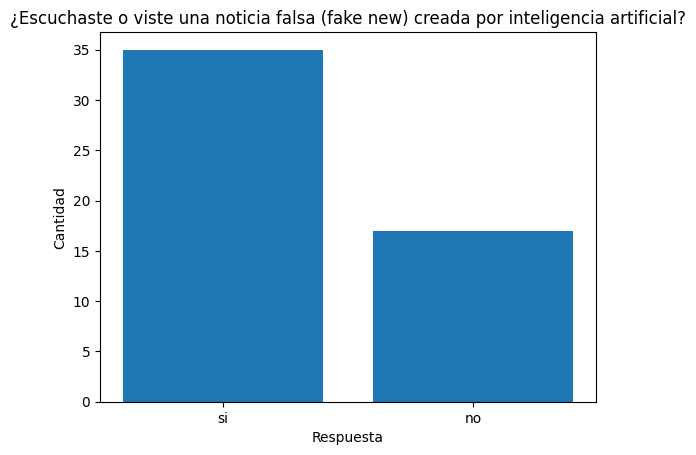

In [90]:
df = pd.read_csv('UsoIaModificado.csv')
counts = df['¿Escuchaste o viste una noticia falsa (fake new) creada por inteligencia artificial?'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('¿Escuchaste o viste una noticia falsa (fake new) creada por inteligencia artificial?')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

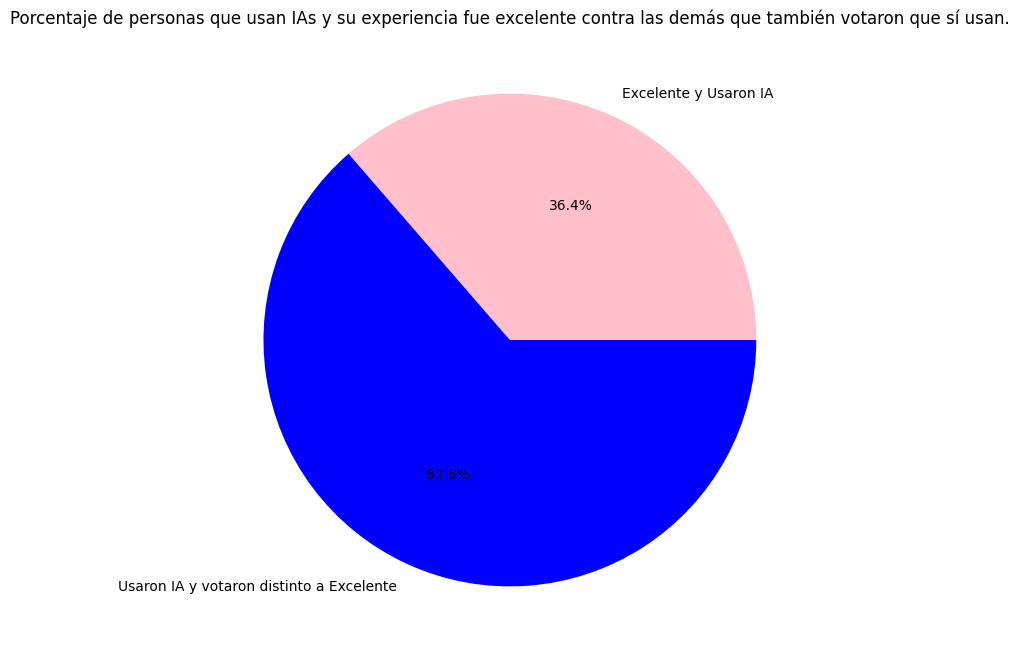

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# leemos las columnas por su índice porque sino nos tiraba error por el nombre muy largo
csv = pd.read_csv('UsoIaModificado.csv')
csvColumnas = list(csv.columns)

indiceExperiencia = 3

indiceUsanIA = 1

usanIAExcelente = csv[(csv.iloc[:, indiceExperiencia] == 'excelente') &
                             (csv.iloc[:, indiceUsanIA] == 'sí')]

usanIANoExcelente = csv[(csv.iloc[:, indiceExperiencia] != 'excelente') &
                             (csv.iloc[:, indiceUsanIA] == 'sí')]

totalUsan = len(csv[csv.iloc[:, indiceUsanIA] == 'sí'])

porcentajeExcelente = (len(usanIAExcelente) / totalUsan) * 100
porcentajeNoExcelente = (len(usanIANoExcelente) / totalUsan) * 100

plt.figure(figsize=(8, 8))
plt.pie([porcentajeExcelente, porcentajeNoExcelente], labels=['Excelente y Usaron IA', 'Usaron IA y votaron distinto a Excelente'], autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Porcentaje de personas que usan IAs y su experiencia fue excelente contra las demás que también votaron que sí usan.')

plt.show()
